Kovarians(X, Y)       = 1.92
Korelasi Pearson(X, Y) = 0.011
Korelasi Pearson(X², Y)= 0.988


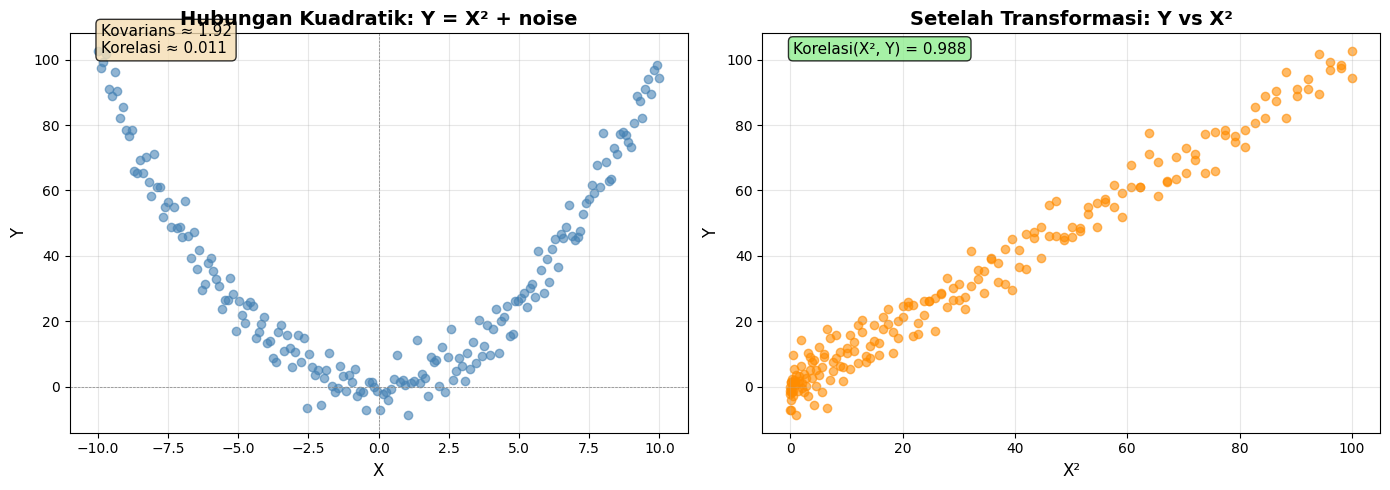

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 1. Generate data dengan hubungan kuadratik Y = X² + noise
np.random.seed(42)
X = np.linspace(-10, 10, 200)          # X simetris dari -10 hingga 10
Y = X**2 + np.random.normal(0, 5, 200) # Y = X² + noise Gaussian

# 2. Hitung statistik
cov_xy = np.cov(X, Y, bias=True)[0, 1]  # Kovarians populasi
corr_xy, _ = pearsonr(X, Y)             # Korelasi Pearson
corr_x2y, _ = pearsonr(X**2, Y)         # Korelasi antara X² dan Y

print(f"Kovarians(X, Y)       = {cov_xy:.2f}")
print(f"Korelasi Pearson(X, Y) = {corr_xy:.3f}")
print(f"Korelasi Pearson(X², Y)= {corr_x2y:.3f}")

# 3. Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Scatter X vs Y (pola kuadratik)
axes[0].scatter(X, Y, alpha=0.6, color='steelblue')
axes[0].set_title('Hubungan Kuadratik: Y = X² + noise', fontsize=14, fontweight='bold')
axes[0].set_xlabel('X', fontsize=12)
axes[0].set_ylabel('Y', fontsize=12)
axes[0].axhline(0, color='gray', linewidth=0.5, linestyle='--')
axes[0].axvline(0, color='gray', linewidth=0.5, linestyle='--')
axes[0].grid(True, alpha=0.3)
axes[0].text(0.05, 0.95, f'Kovarians ≈ {cov_xy:.2f}\nKorelasi ≈ {corr_xy:.3f}', 
             transform=axes[0].transAxes, fontsize=11,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Plot 2: Scatter X² vs Y (menjadi linear!)
X_sq = X**2
axes[1].scatter(X_sq, Y, alpha=0.6, color='darkorange')
axes[1].set_title('Setelah Transformasi: Y vs X²', fontsize=14, fontweight='bold')
axes[1].set_xlabel('X²', fontsize=12)
axes[1].set_ylabel('Y', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].text(0.05, 0.95, f'Korelasi(X², Y) = {corr_x2y:.3f}', 
             transform=axes[1].transAxes, fontsize=11,
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

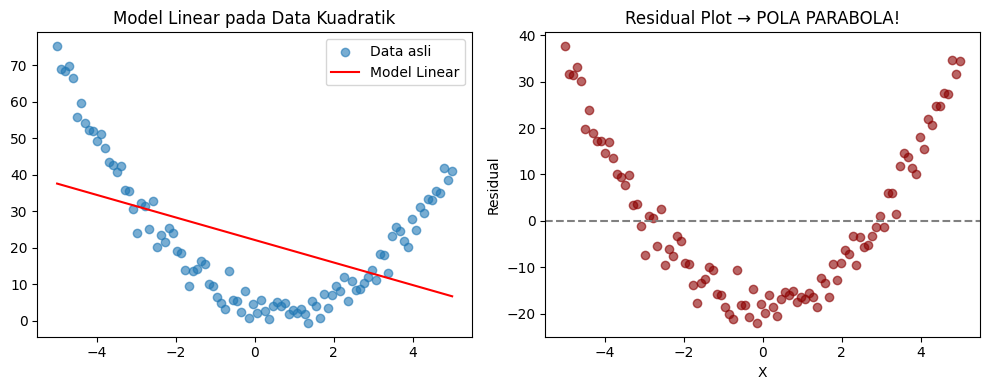

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data dengan hubungan kuadratik tersembunyi
np.random.seed(0)
X = np.linspace(-5, 5, 100).reshape(-1, 1)
Y = 2 * X[:, 0]**2 - 3 * X[:, 0] + 5 + np.random.normal(0, 3, 100)

# Fit model LINEAR sederhana
model_linear = LinearRegression().fit(X, Y)
Y_pred_linear = model_linear.predict(X)
residuals = Y - Y_pred_linear

# Plot residual
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X, Y, alpha=0.6, label='Data asli')
plt.plot(X, Y_pred_linear, 'r-', label='Model Linear')
plt.title('Model Linear pada Data Kuadratik')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X, residuals, alpha=0.6, color='darkred')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residual Plot → POLA PARABOLA!')
plt.xlabel('X'); plt.ylabel('Residual')
plt.tight_layout()
plt.show()

Model Linear:
  R² = 0.227
  MSE = 276.23

Model Kuadratik (X + X²):
  R² = 0.979
  MSE = 7.68


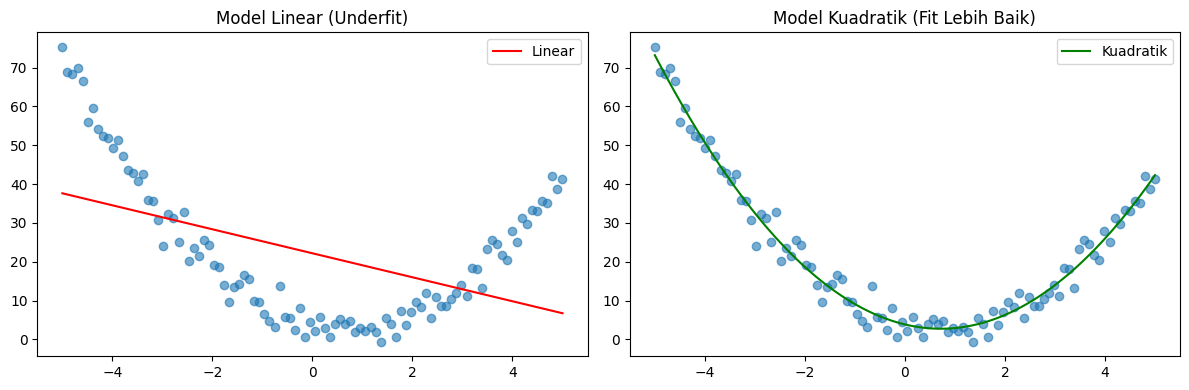

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Bandingkan model linear vs kuadratik
model_quad = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_quad.fit(X, Y)
Y_pred_quad = model_quad.predict(X)

print("Model Linear:")
print(f"  R² = {r2_score(Y, Y_pred_linear):.3f}")
print(f"  MSE = {mean_squared_error(Y, Y_pred_linear):.2f}")

print("\nModel Kuadratik (X + X²):")
print(f"  R² = {r2_score(Y, Y_pred_quad):.3f}")
print(f"  MSE = {mean_squared_error(Y, Y_pred_quad):.2f}")

# Visualisasi perbandingan
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X, Y, alpha=0.6)
plt.plot(X, Y_pred_linear, 'r-', label='Linear')
plt.title('Model Linear (Underfit)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X, Y, alpha=0.6)
plt.plot(X, Y_pred_quad, 'g-', label='Kuadratik')
plt.title('Model Kuadratik (Fit Lebih Baik)')
plt.legend()
plt.tight_layout()
plt.show()

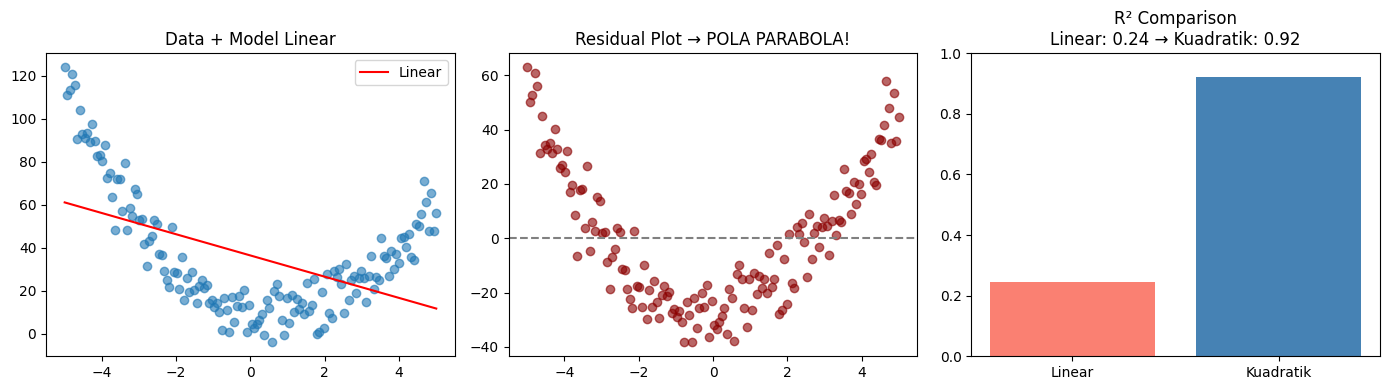

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Data dengan hubungan kuadratik: Y = 3*X² - 5*X + 10
np.random.seed(0)
X = np.linspace(-5, 5, 150).reshape(-1, 1)
Y = 3 * X[:,0]**2 - 5 * X[:,0] + 10 + np.random.normal(0, 8, 150)

# Fit model linear → lihat residual plot
model_linear = LinearRegression().fit(X, Y)
residuals = Y - model_linear.predict(X)

plt.figure(figsize=(14, 4))

# Plot 1: Scatter + residual
plt.subplot(1, 3, 1)
plt.scatter(X, Y, alpha=0.6)
plt.plot(X, model_linear.predict(X), 'r-', label='Linear')
plt.title('Data + Model Linear')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X, residuals, alpha=0.6, color='darkred')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residual Plot → POLA PARABOLA!')

# Plot 2: Bandingkan R² model linear vs kuadratik
model_quad = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_quad.fit(X, Y)

r2_linear = r2_score(Y, model_linear.predict(X))
r2_quad = r2_score(Y, model_quad.predict(X))

plt.subplot(1, 3, 3)
plt.bar(['Linear', 'Kuadratik'], [r2_linear, r2_quad], color=['salmon', 'steelblue'])
plt.title(f'R² Comparison\nLinear: {r2_linear:.2f} → Kuadratik: {r2_quad:.2f}')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
from scipy.stats import kendalltau

# Dataset restoran
data = pd.DataFrame({
    'rating': [5,4,3,5,2,4,3,5,4,3],
    'jarak': [1,2,3,1,3,2,3,1,2,3],      # 1=dekat, 3=jauh
    'pelayanan': [3,3,2,3,1,2,2,3,3,2],  # 1=buruk, 3=baik
    'harga': [3,2,1,3,1,2,2,3,2,1]       # 1=murah, 3=mahal
})

# Hitung korelasi dengan target
for fitur in ['jarak', 'pelayanan', 'harga']:
    tau, _ = kendalltau(data[fitur], data['rating'])
    print(f"{fitur:12s}: τ = {tau:+.3f} → {'POSITIF' if tau>0 else 'NEGATIF'}")

# Output:
# jarak       : τ = -0.689 → NEGATIF (semakin jauh, rating turun)
# pelayanan   : τ = +0.844 → POSITIF (pelayanan baik → rating naik) ← FITUR TERBAIK
# harga       : τ = +0.289 → POSITIF (mahal tidak selalu berarti rating tinggi)

jarak       : τ = -0.957 → NEGATIF
pelayanan   : τ = +0.836 → POSITIF
harga       : τ = +0.899 → POSITIF


# init library and import data

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Salary.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ishank2005/salary-csv",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-1479235269.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 417/417 [00:00<00:00, 606kB/s]

First 5 records:    YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch

## pearson corelation

In [19]:
# Rumus Pearson correlation (r):
# r = Σ((x_i - x̄) * (y_i - ȳ)) / sqrt(Σ((x_i - x̄)^2) * Σ((y_i - ȳ)^2))

def calculate_pearson(x,y):
    x=np.array(x)
    y=np.array(y)

    cov_xy= np.mean((x-np.mean(x)) * (y-np.mean(y)))
    
    return cov_xy/(np.std(x, ddof=0)*(np.std(y, ddof=0)))

In [20]:
X = np.array([70, 75, 80, 85, 90, 95, 60, 65])
Y = np.array([68, 72, 78, 84, 88, 92, 58, 62])

In [21]:
from scipy.stats import pearsonr

rp_manual=calculate_pearson(X,Y)
rp_lib=pearsonr(X,Y)


r, p_value=rp_lib

r_lib_square=r **2

print(f'manual = {rp_manual} & library = {r_lib_square}')

manual = 0.9983643461564323 & library = 0.9967313676763608


Text(62, 90, 'r = 0.998\nr² = 0.997\n99.7% variansi bersama')

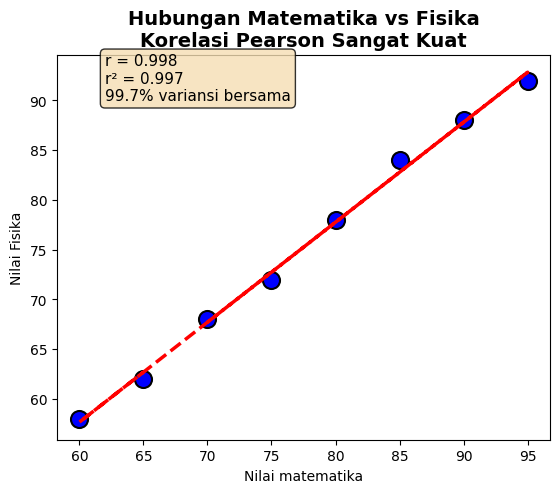

In [26]:
plt.figure(figsize=(14,5))

# scatter plot
plt.subplot(1,2,1)
sns.scatterplot(x=X, y=Y, s=150, color='blue', edgecolor='black', linewidth=1.5)

# garis regresi
z=np.polyfit(X,Y, 1)
p = np.poly1d(z)
plt.plot(X, p(X), 'r--',  linewidth=2.5, label=f'regresi linear\n  r={rp_manual:.3f} p={p_value:.3f}')
plt.xlabel('Nilai matematika')
plt.ylabel('Nilai Fisika')

plt.title('Hubungan Matematika vs Fisika\nKorelasi Pearson Sangat Kuat', 
          fontsize=14, fontweight='bold')
# Tambahkan teks interpretasi
plt.text(62, 90, f'r = {r:.3f}\nr² = {r_lib_square:.3f}\n{r_lib_square*100:.1f}% variansi bersama', 
         fontsize=11, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))



## spearman corelation

In [10]:
# r = Σ((x_i - x̄) * (y_i - ȳ)) / sqrt(Σ((x_i - x̄)^2) * Σ((y_i - ȳ)^2))
def calculate_spearman(x,y):
    x=np.argsort(np.argsort(x))
    y=np.argsort(np.argsort(y))

    return calculate_pearson(x, y)

## kendall's tau correlation

In [29]:
# τ = (C - D) / (0.5 * n * (n-1))
def calculate_kendals_tau(x,y):
    n=len(x)
    num_concordant=0
    num_discordant=0

    for i in range(n-1):
        for j in range(i+1, n):
            dx= x[i] -x[j]
            dy=y[i] -y[i]
            prod=dx * dy
            if prod > 0 :
                num_concordant+=1
            else :
                num_discordant+=1
    return (num_concordant - num_discordant)/(0.5 * n *(n-1))

## Point biserial correlation

In [32]:
# r_pb = (M1 - M0) / s * sqrt(p*q)
def calculate_point_biserial(x,y):
    x=np.array(x)
    y=np.array(y)

    if set(np.unique(y) <= {0,1}):
        x1=x[y==1]
        x0=x[y==0]
        M1=np.sum(x1)/len(x1)
        M2=np.sum(x2)/len(x2)

        s=np.std(x, ddof=0)
        p=len(x1)/len(x)
        q = len(x0)/len(x)

        return (M1-M2)/s * np.sqrt(p*q)
    else :
        return None